# Tutorial DM Search
**Problem**: estimate UL on $<\sigma v>$ for annihilating DM using different IACT observations;

**Minimise**: a joint Poisson Likelihood (a term per each dataset).

In [1]:
#pragma cling add_library_path("/home/cosimo/work/gLike_build/lib")
#pragma cling load("libgLike")
#pragma cling add_include_path("/home/cosimo/work/gLike_build/include")

In [2]:
#include "Iact1dUnbinnedLkl.h"
#include "Iact1dBinnedLkl.h"
#include "JointLkl.h"

Let us consider a source with a $J$-factor: $J=10^{19}\,{\rm GeV}^2\,{\rm cm}^{-5}$ and a DM particle of mass $m_{\rm DM} = 1\,{\rm TeV}$ annihilating in a $b\bar{b}$ pair.

In [3]:
// log_10 of J-factor of the assumed DM source
Double_t logJ = 19.; // [GeV^2 cm^-5]
// statistical error in log_10 on the J-factor of the assumed DM source
Double_t DlogJ = 0; // [GeV^2 cm^-5]
// mass of the DM particle
Double_t mass = 1000.; // [GeV]
// dN/dE photon spectrum from gLike data
TString dNdEFileName = Form("$GLIKESYS/DM/dNdE/Cirelli/dNdESignal_bb_%.1fmass.root", mass);

Let us examine the photon spectra produced by this candidate for this annihilation

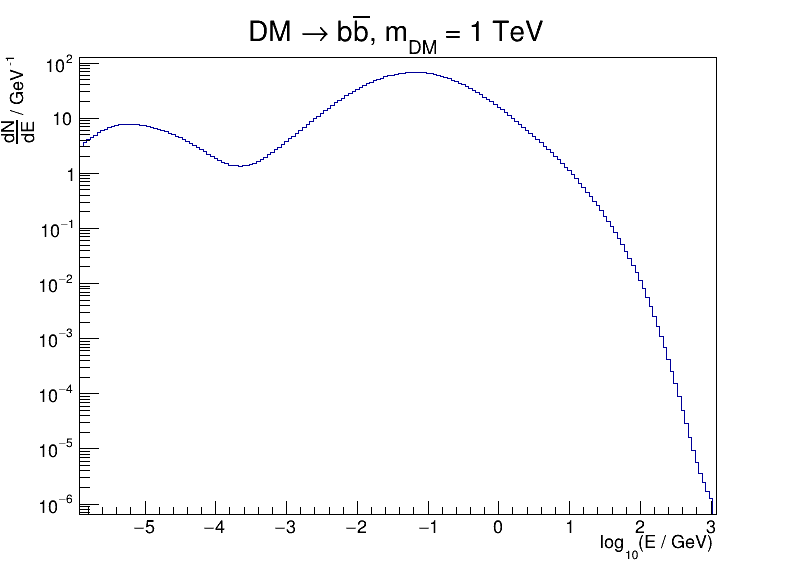

In [4]:
TFile *file = TFile::Open(dNdEFileName);
TCanvas *c1 = new TCanvas("c1", "", 800, 600);
TH1F* dNdE = (TH1F*) file->Get("hdNdE");
dNdE->SetStats(0);
dNdE->SetTitle("DM #rightarrow b#bar{b}, m_{DM} = 1 TeV");
dNdE->GetYaxis()->SetTitle("#frac{dN}{dE} / GeV^{-1}");
dNdE->GetXaxis()->SetTitle("log_{10}(E / GeV)");
dNdE->Draw();
c1->SetLogy();
c1->Draw();

For building the likelihood we need to read the IACT data.     
We will make a **joint likelihood with an unbinned and a binned likelihood terms and minimise them jointly**.

In [5]:
// input file with event list and their associated IRFs
TString inputFile1 = "$GLIKESYS/data/root/genericIact_dataIRF_01.root";
// input file with event list and their associated IRFs
TString inputFile2 = "$GLIKESYS/data/root/genericIact_dataIRF_02.root";

In [6]:
// the CI will be 2 sigma (a dropt of 4 in -2 log L)
Double_t errorDef = 4;

// create and configure an unbinned likelihood term using one of the datasets
Iact1dUnbinnedLkl *unbn = new Iact1dUnbinnedLkl(Form("logJ=%.2f DlogJ=0 inputfile=%s", logJ, inputFile1.Data()));
unbn->ReaddNdESignal(dNdEFileName);
// set units for DM annihilation <sv>
unbn->SetDMAnnihilationUnitsForG(mass);

// create and configure a binned likelihood term using one of the datasets
Iact1dBinnedLkl *bn = new Iact1dBinnedLkl(Form("logJ=%.2f DlogJ=0 inputfile=%s", logJ, inputFile2.Data()));
bn->ReaddNdESignal(dNdEFileName);
// set units for DM annihilation <sv>
bn->SetDMAnnihilationUnitsForG(mass);

Iact1dUnbinnedLkl::CheckHistograms Message: will create fHdNdEpSignal from fHdNdESignal, fHAeff, fGEreso & fGEbias... Done! 
Iact1dUnbinnedLkl::CheckHistograms Message: will create fHdNdEpSignal from fHdNdESignal, fHAeff, fGEreso & fGEbias... Done! 


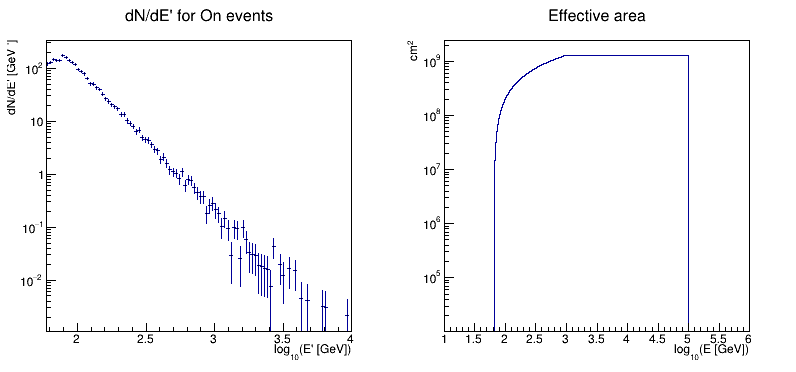

In [7]:
TCanvas *c2 = new TCanvas("c2", "", 800, 400);
c2->Divide(2);
TPad *p1 = (TPad*) c2->cd(1);
p1->SetLogy();
TH1F* hOn = bn->GetHdNdEpOn(); 
hOn->SetStats(0);
hOn->Draw();
TPad *p2 = (TPad*) c2->cd(2);
p2->SetLogy();
TH1F* aEff = bn->GetHAeff();
aEff->Draw();
c2->Draw();

In [8]:
// join the two likelihood terms in a single joint likelihood
JointLkl *jointLkl = new JointLkl(Form("DlogJ=%.2f", DlogJ));
jointLkl->SetErrorDef(errorDef);
jointLkl->AddSample(unbn);
jointLkl->AddSample(bn);

In [9]:
 // print how JointLkl looks like
jointLkl->PrintData();

 *              Object Name : JointLkl
 *             # of samples = 2
 ****************************************
                                        *              Object Name : Iact1dUnbinnedLkl
                                        *                E' range  = [59.2,10000] GeV
                                        *                 Non/Noff = 11572/11337
                                        *             Measured tau = 1.00402 +/- 0.00599
                                        *         Observation time = 45 h
                                        *                   log(J) = (19 +/- 0) GeV^2 cm^-5  or  GeV cm^-2
                                        *               Aeff histo : YES
                                        *           Off Aeff histo : NO
                                        *       E Reso/Bias graphs : YES
                                        *         Migration matrix : NO
                                        *    Background rate histo : YES


In [10]:
// call minimization and print results
jointLkl->ComputeLklVsG();
jointLkl->PrintOverview();

Lkl::ComputeLklVsG (JointLkl) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (JointLkl) Message: minimizing -2logL
Lkl::CallMinimization (JointLkl) Results: Trial #1, g: 1.22e+02 +/- 1.50e+02 (8.07e-24 +/- 9.92e-24); -2logL = 278687; iflag = 0 (converged)
JointLkl::PrepareForLklScan (JointLkl) Message: call ComputeLklVsG for 2 samples:
Lkl::ComputeLklVsG (Iact1dUnbinnedLkl) Message: computing -2logL in 200 points between g=-90.2988(-5.96529e-24), and g=334.595(2.21039e-23), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (Iact1dBinnedLkl) Message: computing -2logL in 200 points between g=-90.2988(-5.96529e-24), and g=334.595(2.21039e-23), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (JointLkl) Message: computing -2logL in 200 points between g=-90.2988(-5.96529e-24), and g=334.595(2.21039e-23), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (JointLkl) Message: g_mi

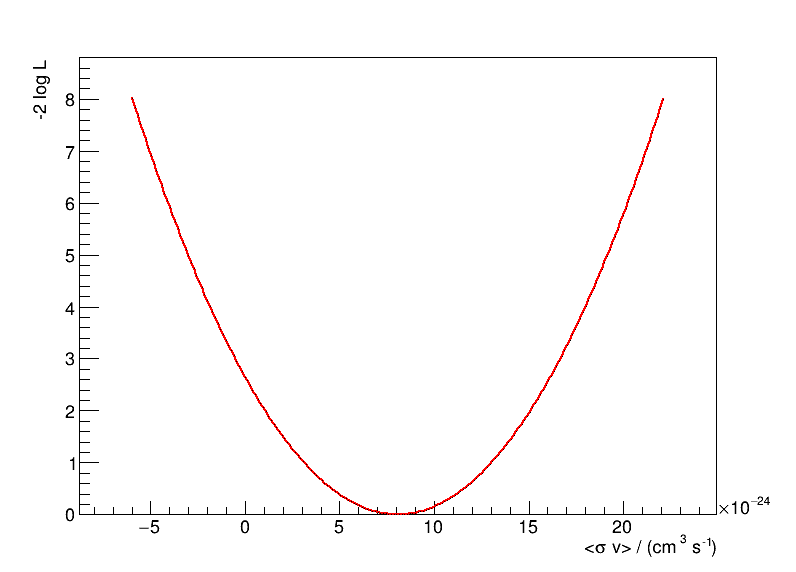

In [11]:
TCanvas *c3 = new TCanvas("c3", "", 800, 600);
TGraph* logLklVsG = jointLkl->GetLklVsG();
logLklVsG->SetTitle("");
logLklVsG->GetXaxis()->SetTitle("<#sigma v> / (cm^{3} s^{-1})");
logLklVsG->GetYaxis()->SetTitle("-2 log L");
logLklVsG->SetLineWidth(2);
logLklVsG->SetLineColor(2);
logLklVsG->Draw();
c3->Draw();